# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


In [3]:
# url = "https://api.openweathermap.org/data/2.5/weather?"
# city_url = url + "q=" + city + "&appid=" + weather_api_key 
# city_weather = requests.get(city_url)
# city_weather

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()       

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]['all']
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | tindouf
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | tofol
Processing Record 7 of Set 1 | tura
Processing Record 8 of Set 1 | albertina
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | qaqortoq
Processing Record 11 of Set 1 | whiteville
Processing Record 12 of Set 1 | chacabuco
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | minas de marcona
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | mukalla
Processing Record 17 of Set 1 | myeik
Processing Record 18 of Set 1 | alesund
Processing Record 19 of Set 1 | kilinochchi
Processing Record 20 of Set 1 | yangjiang
Processing Record 21 of Set 1 | lihue
Processing Record 22 of Set 1 | 

Processing Record 44 of Set 4 | ecoporanga
Processing Record 45 of Set 4 | lagoa
Processing Record 46 of Set 4 | pacific grove
Processing Record 47 of Set 4 | jinghong
Processing Record 48 of Set 4 | amga
Processing Record 49 of Set 4 | worgl
Processing Record 0 of Set 5 | kavaratti
Processing Record 1 of Set 5 | college
Processing Record 2 of Set 5 | east london
Processing Record 3 of Set 5 | kiunga
Processing Record 4 of Set 5 | ende
Processing Record 5 of Set 5 | hermanus
Processing Record 6 of Set 5 | tolanaro
Processing Record 7 of Set 5 | port mathurin
Processing Record 8 of Set 5 | whangarei
Processing Record 9 of Set 5 | tonkino
Processing Record 10 of Set 5 | sanga-sanga
Processing Record 11 of Set 5 | mount isa
Processing Record 12 of Set 5 | ilulissat
Processing Record 13 of Set 5 | ghat
Processing Record 14 of Set 5 | wagar
Processing Record 15 of Set 5 | bonthe
Processing Record 16 of Set 5 | vila franca do campo
Processing Record 17 of Set 5 | colatina
Processing Record 1

City not found. Skipping...
Processing Record 37 of Set 8 | andreyevo
Processing Record 38 of Set 8 | queenstown
Processing Record 39 of Set 8 | koneurgench
City not found. Skipping...
Processing Record 40 of Set 8 | namtsy
Processing Record 41 of Set 8 | naze
Processing Record 42 of Set 8 | taroa
Processing Record 43 of Set 8 | xai-xai
Processing Record 44 of Set 8 | kununurra
Processing Record 45 of Set 8 | marka
Processing Record 46 of Set 8 | saarijarvi
Processing Record 47 of Set 8 | ningchegu
Processing Record 48 of Set 8 | la'ie
Processing Record 49 of Set 8 | udachny
Processing Record 0 of Set 9 | yagry
City not found. Skipping...
Processing Record 1 of Set 9 | palmer
Processing Record 2 of Set 9 | moratuwa
Processing Record 3 of Set 9 | pucheng
Processing Record 4 of Set 9 | mostaganem
Processing Record 5 of Set 9 | demopolis
Processing Record 6 of Set 9 | ciudad bolivar
Processing Record 7 of Set 9 | papao
Processing Record 8 of Set 9 | luchegorsk
Processing Record 9 of Set 9

Processing Record 23 of Set 12 | ago-are
Processing Record 24 of Set 12 | baker city
Processing Record 25 of Set 12 | ghatanji
Processing Record 26 of Set 12 | khorol'
City not found. Skipping...
Processing Record 27 of Set 12 | new norfolk
Processing Record 28 of Set 12 | tannum sands
Processing Record 29 of Set 12 | formosa do rio preto
Processing Record 30 of Set 12 | mora
Processing Record 31 of Set 12 | urengoy
Processing Record 32 of Set 12 | borgarnes
Processing Record 33 of Set 12 | barabai
Processing Record 34 of Set 12 | porvoo
Processing Record 35 of Set 12 | padangsidempuan
Processing Record 36 of Set 12 | freetown
Processing Record 37 of Set 12 | lahad datu
Processing Record 38 of Set 12 | stephenville
Processing Record 39 of Set 12 | manaure
Processing Record 40 of Set 12 | kostomuksha
Processing Record 41 of Set 12 | labrador city
Processing Record 42 of Set 12 | shiraz
Processing Record 43 of Set 12 | cave spring
Processing Record 44 of Set 12 | bossier city
Processing 

In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,2.79,87,100,9.20,CL,1696645362
1,bilibino,68.0546,166.4372,-8.36,90,96,0.76,RU,1696645459
2,tindouf,27.6711,-8.1474,27.25,19,90,6.17,DZ,1696645460
3,puerto ayora,-0.7393,-90.3518,23.64,94,81,2.24,EC,1696645460
4,waitangi,-43.9535,-176.5597,13.23,81,33,2.68,NZ,1696645460


In [21]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,2.79,87,100,9.20,CL,1696645362
1,bilibino,68.0546,166.4372,-8.36,90,96,0.76,RU,1696645459
2,tindouf,27.6711,-8.1474,27.25,19,90,6.17,DZ,1696645460
3,puerto ayora,-0.7393,-90.3518,23.64,94,81,2.24,EC,1696645460
4,waitangi,-43.9535,-176.5597,13.23,81,33,2.68,NZ,1696645460


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

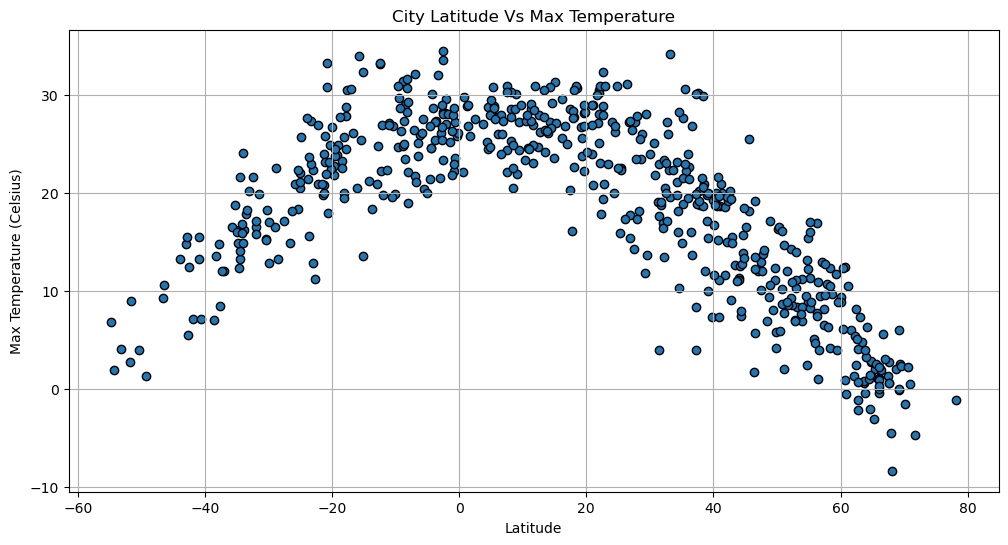

In [24]:
# Build scatter plot for latitude vs. temperature
x=city_data_df['Lat']
y=city_data_df['Max Temp']
plt.figure(figsize=(12, 6))
plt.scatter(x,y, marker='o', edgecolor='black')

# Incorporate the other graph properties

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Celsius)')
plt.title('City Latitude Vs Max Temperature')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

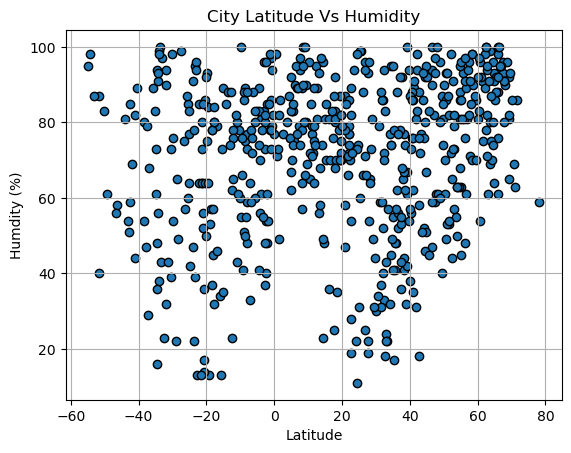

In [31]:
# Build the scatter plots for latitude vs. humidity
x=city_data_df['Lat']
y=city_data_df['Humidity']


plt.scatter(x,y, marker='o', edgecolor='black')
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humdity (%)")
plt.title("City Latitude Vs Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

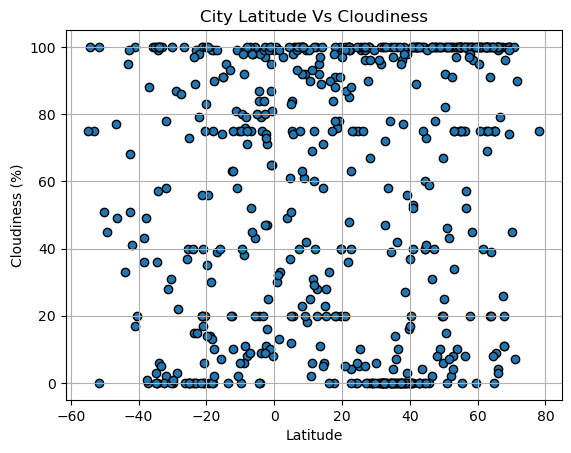

In [30]:
# Build the scatter plots for latitude vs. cloudiness
x=city_data_df['Lat']
y=city_data_df['Cloudiness']


plt.scatter(x,y, marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude Vs Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

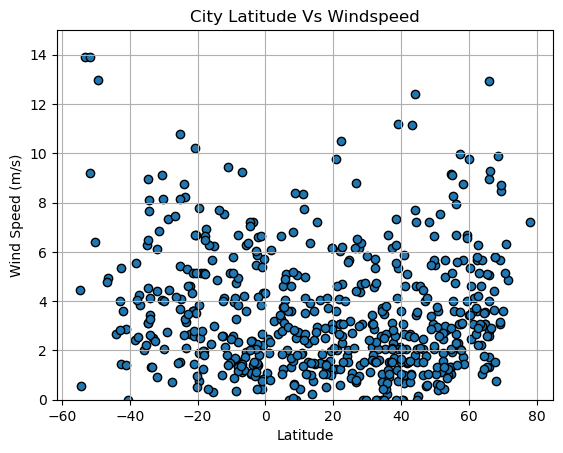

In [29]:
# Build the scatter plots for latitude vs. wind speed
x=city_data_df['Lat']
y=city_data_df['Wind Speed']


plt.scatter(x,y, marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude Vs Windspeed")
plt.ylim(0, 15)
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [62]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    return {
        'slope': slope,
        'intercept': intercept,
        'r_value': rvalue,
        'p_value': pvalue,
        'std_err': stderr
    }






In [63]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bilibino,68.0546,166.4372,-8.36,90,96,0.76,RU,1696645459
2,tindouf,27.6711,-8.1474,27.25,19,90,6.17,DZ,1696645460
5,tofol,5.3248,163.0078,30.88,70,75,4.63,FM,1696645460
6,tura,25.5198,90.2201,22.58,99,99,1.08,IN,1696645460
9,qaqortoq,60.7167,-46.0333,0.89,96,100,2.47,GL,1696645461


In [64]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,2.79,87,100,9.20,CL,1696645362
3,puerto ayora,-0.7393,-90.3518,23.64,94,81,2.24,EC,1696645460
4,waitangi,-43.9535,-176.5597,13.23,81,33,2.68,NZ,1696645460
7,albertina,-22.2008,-46.6158,20.94,85,79,2.67,BR,1696645460
8,edinburgh of the seven seas,-37.0676,-12.3116,12.09,68,88,3.85,SH,1696645460


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.775873120664335


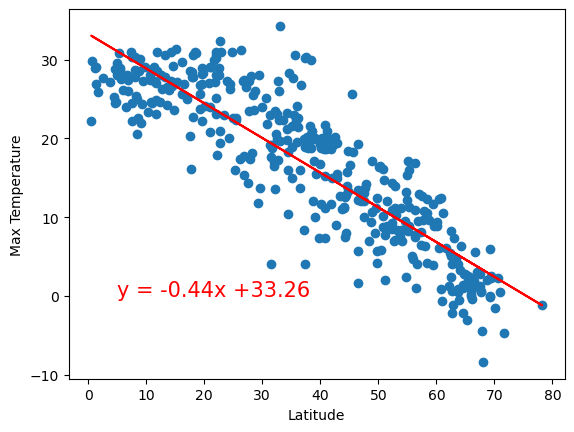

In [76]:
# Linear regression on Northern Hemisphere
x=northern_hemi_df['Lat']
y=northern_hemi_df['Max Temp']
results=linear_regression(x, y)
# Get regression values
regress_values = x * results['slope'] + results['intercept']
line_eq = "y = " + str(round(results['slope'],2)) + "x +" + str(round(results['intercept'],2))

# Create Plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(5,0),fontsize=15,color="red")
print(f"The r-value is: {results['r_value']**2}")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

plt.show()


The r-value is: 0.639412358979065


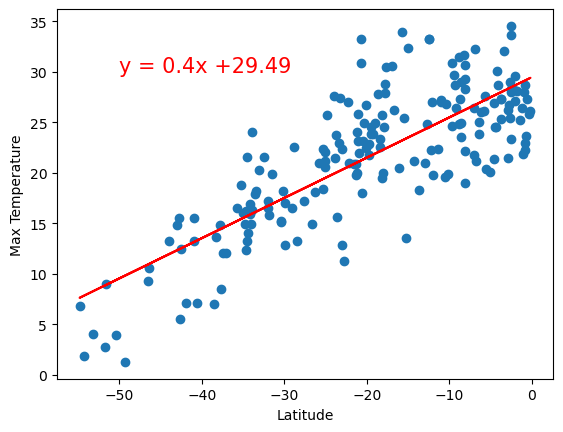

In [77]:
# Linear regression on Southern Hemisphere
x=southern_hemi_df['Lat']
y=southern_hemi_df['Max Temp']
results=linear_regression(x, y)
# Get regression values
regress_values = x * results['slope'] + results['intercept']
line_eq = "y = " + str(round(results['slope'],2)) + "x +" + str(round(results['intercept'],2))

# Create Plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
print(f"The r-value is: {results['r_value']**2}")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

plt.show()

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.020760598455275905


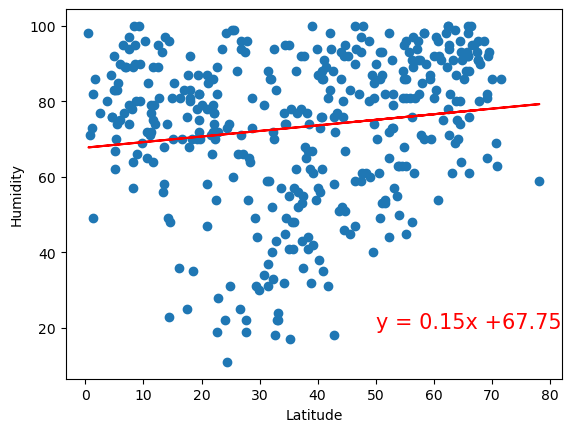

In [80]:
# Northern Hemisphere
x=northern_hemi_df['Lat']
y=northern_hemi_df['Humidity']
results=linear_regression(x, y)
# Get regression values
regress_values = x * results['slope'] + results['intercept']
line_eq = "y = " + str(round(results['slope'],2)) + "x +" + str(round(results['intercept'],2))

# Create Plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
print(f"The r-value is: {results['r_value']**2}")

plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.show()

The r-value is: 0.002332336342042867


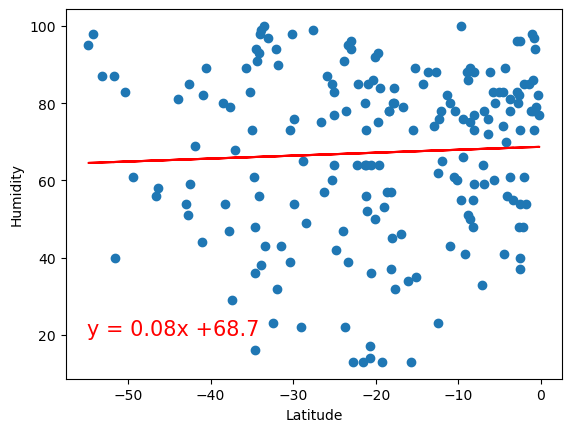

In [84]:
# Southern Hemisphere
x=southern_hemi_df['Lat']
y=southern_hemi_df['Humidity']
results=linear_regression(x, y)
# Get regression values
regress_values = x * results['slope'] + results['intercept']
line_eq = "y = " + str(round(results['slope'],2)) + "x +" + str(round(results['intercept'],2))

# Create Plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
print(f"The r-value is: {results['r_value']**2}")

plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.show()

Analysis: As the Pearson's correlation coefficient (r value) is close to zero in both the hemispheres, it indicates the very weak or negligible linear relationship between Latitude and Humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.011446765680739835


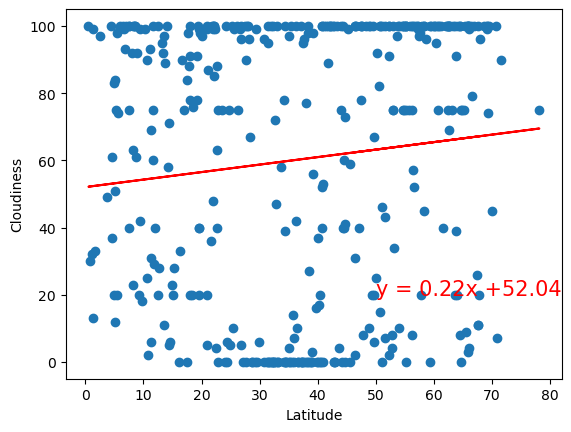

In [82]:
# Northern Hemisphere
x=northern_hemi_df['Lat']
y=northern_hemi_df['Cloudiness']
results=linear_regression(x, y)
# Get regression values
regress_values = x * results['slope'] + results['intercept']
line_eq = "y = " + str(round(results['slope'],2)) + "x +" + str(round(results['intercept'],2))

# Create Plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
print(f"The r-value is: {results['r_value']**2}")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.show()

The r-value is: 0.007331037166170935


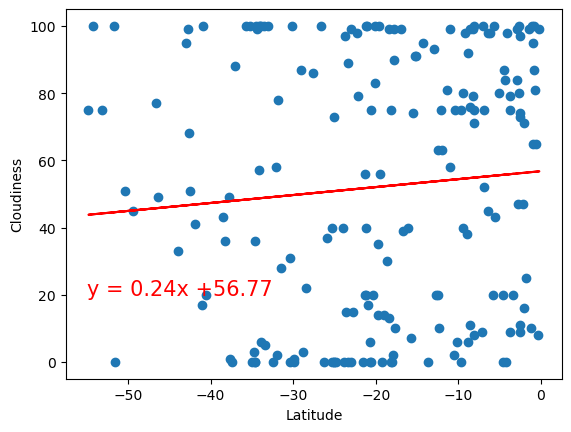

In [85]:
# Southern Hemisphere
x=southern_hemi_df['Lat']
y=southern_hemi_df['Cloudiness']
results=linear_regression(x, y)
# Get regression values
regress_values = x * results['slope'] + results['intercept']
line_eq = "y = " + str(round(results['slope'],2)) + "x +" + str(round(results['intercept'],2))

# Create Plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
print(f"The r-value is: {results['r_value']**2}")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.show()

Analysis: As the Pearson's correlation coefficient (r value) is close to zero in both the hemispheres, it indicates  the very weak or negligible linear relationship between Latitude and Cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.044566842237588555


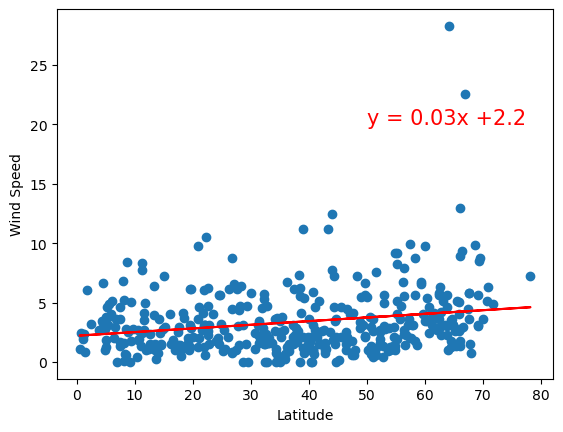

In [86]:
# Northern Hemisphere
x=northern_hemi_df['Lat']
y=northern_hemi_df['Wind Speed']
results=linear_regression(x, y)
# Get regression values
regress_values = x * results['slope'] + results['intercept']
line_eq = "y = " + str(round(results['slope'],2)) + "x +" + str(round(results['intercept'],2))

# Create Plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
print(f"The r-value is: {results['r_value']**2}")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.show()

The r-value is: 0.06388064203061389


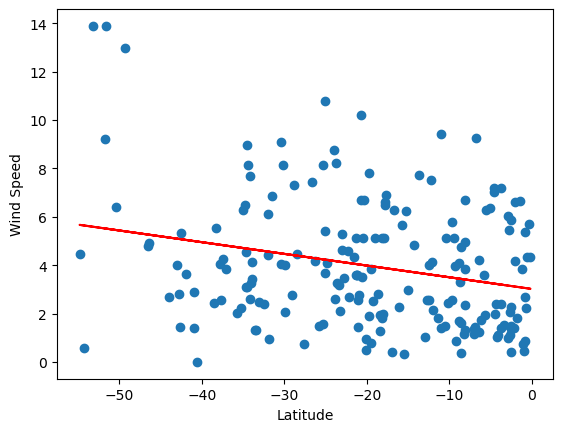

In [88]:
# Southern Hemisphere
x=southern_hemi_df['Lat']
y=southern_hemi_df['Wind Speed']
results=linear_regression(x, y)
# Get regression values
regress_values = x * results['slope'] + results['intercept']
line_eq = "y = " + str(round(results['slope'],2)) + "x +" + str(round(results['intercept'],2))

# Create Plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
print(f"The r-value is: {results['r_value']**2}")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.show()

**Discussion about the linear relationship:**  As the Pearson's correlation coefficient (r value) is close to zero in both the hemispheres, it indicates  the very weak or negligible linear relationship between Latitude and Wind Speed. 